# Analisis Cuaca Di Sekitar Szaged, Hogaria ( 2006 - 2016 )

### Disusun oleh : Nitha Huwaida Hafizha

Project ini bertujuan untuk menganalisis data cuaca di sekitar Sraged, Hungary - dari tahun 2006 hingga 2016 serta mengelompokan data cuaca berdasarkan jenis cuaca yang terdapat pada data set weatherHistory.csv <br><br>
Pada data set cuaca ini terdapat<b> 12 features/attribut</b> yaitu sebagai berikut
1. Formatted Date = Tanggal dan jam <br>
2. Summary = Ringkasan singkat cuaca <br>
3. Precip Type = Jenis curah hujan <br>
4. Temperature (C) = Suhu <br>
5. Apparent Temperature (C) = Suhu Semu<br>
6. Humidity + Kelembapan <br>
7. Wind Speed (km/h) = Kecepatan Angin (km/h)<br>
8. Wind Bearing (degrees) = Arah angin<br>
9. Visibility (km) =  jarak pandang /tingkat kejernihan (transparansi) daripada atmosfer <br>
10. Loud Cover     <br>
11. Pressure (millibars) = Tekanan (km)  <br>
12. Daily Summary = Ringkasan Cuaca Harian   <br>

Sumber data diambil dari website https://www.kaggle.com/budincsevity/szeged-weather 

Berikut merupakan library yang akan digunakan pada project ini, untuk melakukan analisis data weatherHistory.csv

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns 
%matplotlib inline
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

Sebelum melakukan proses analisis, hal pertama yang dilakukan adalah meload data dari file data set yang telah dipilih

In [9]:
import s3fs

s3=s3fs.S3FileSystem()
with s3.open('dts-bda-p3/weatherHistory.csv', 'rb') as f:
    weather= pd.read_csv(f)

Setelah melakukan load data, tampilkan data awal yang terdapat pada file data set weatherHistory.csv

In [10]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


Berikut ini merupakan kode program ntuk mengetahui jumlah data dan informasi detail terkait feature - feature yang ada pada data set weatherHistory.csv

In [4]:
len(weather)

96453

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null int64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


Sebelum lanjut ke proses selanjutnya, lakukan <b>Cleaning Data</b> terlebih dahulu, untuk membersihkan data dari nilai <b>null</b>. Cleaning data dilakukan untuk seluruh feature yang terdapat pada data set weatherHistory.csv

In [6]:
weather[weather['Formatted Date'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [7]:
weather[weather['Summary'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [8]:
weather[weather['Precip Type'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163,9.9820,0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169,9.9820,0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151,9.9820,0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159,9.9820,0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197,16.1000,0,1002.20,Mostly cloudy until night.
52680,2012-04-12 00:00:00.000 +0200,Mostly Cloudy,NaN,10.100000,10.100000,0.61,11.3666,180,16.1000,0,1002.25,Light rain in the morning.
52681,2012-04-12 01:00:00.000 +0200,Partly Cloudy,NaN,10.183333,10.183333,0.64,7.2128,150,16.1000,0,1002.05,Light rain in the morning.
52683,2012-04-12 03:00:00.000 +0200,Mostly Cloudy,NaN,10.700000,10.700000,0.70,14.6993,133,16.1000,0,1001.42,Light rain in the morning.
52684,2012-04-12 04:00:00.000 +0200,Partly Cloudy,NaN,9.744444,8.022222,0.73,11.9623,142,16.1000,0,1001.11,Light rain in the morning.
52687,2012-04-12 07:00:00.000 +0200,Mostly Cloudy,NaN,10.055556,10.055556,0.76,13.9748,213,11.1090,0,1001.22,Light rain in the morning.


In [9]:
weather[weather['Temperature (C)'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [10]:
weather[weather['Apparent Temperature (C)'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [11]:
weather[weather['Humidity'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [12]:
weather[weather['Wind Speed (km/h)'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [13]:
weather[weather['Wind Bearing (degrees)'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [14]:
weather[weather['Visibility (km)'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [15]:
weather[weather['Loud Cover'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [16]:
weather[weather['Pressure (millibars)'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [17]:
weather[weather['Daily Summary'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


Setelah menemukan feature mana yang memiliki nilai null, maka selanjutnya dapat dilakukan pembersihan dengan mengganti nilai null atau menghapus data yang bernilai null.  <br>
<b>Pada project ini, saya memilih untuk menghapus data yang bernilai  null</b>

In [18]:
weather = weather.dropna(axis=0, how='any')

setelah dilakukan penghapusan data null, cek kembali feature Precip Type. Untuk melihat apakah penghapusan data nul berhasil

In [19]:
weather[weather['Precip Type'].isnull()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


Proses selanjutnya adalah membuat <b>Scatter Plot </b> untuk masing - masing features yang terdapat pada data.<br>
Pembuatan scatter plot, digunakan untuk memudahkan kita dalam memilih 2 features yang diduga memiliki korelasi yang kuat satu sama lain.

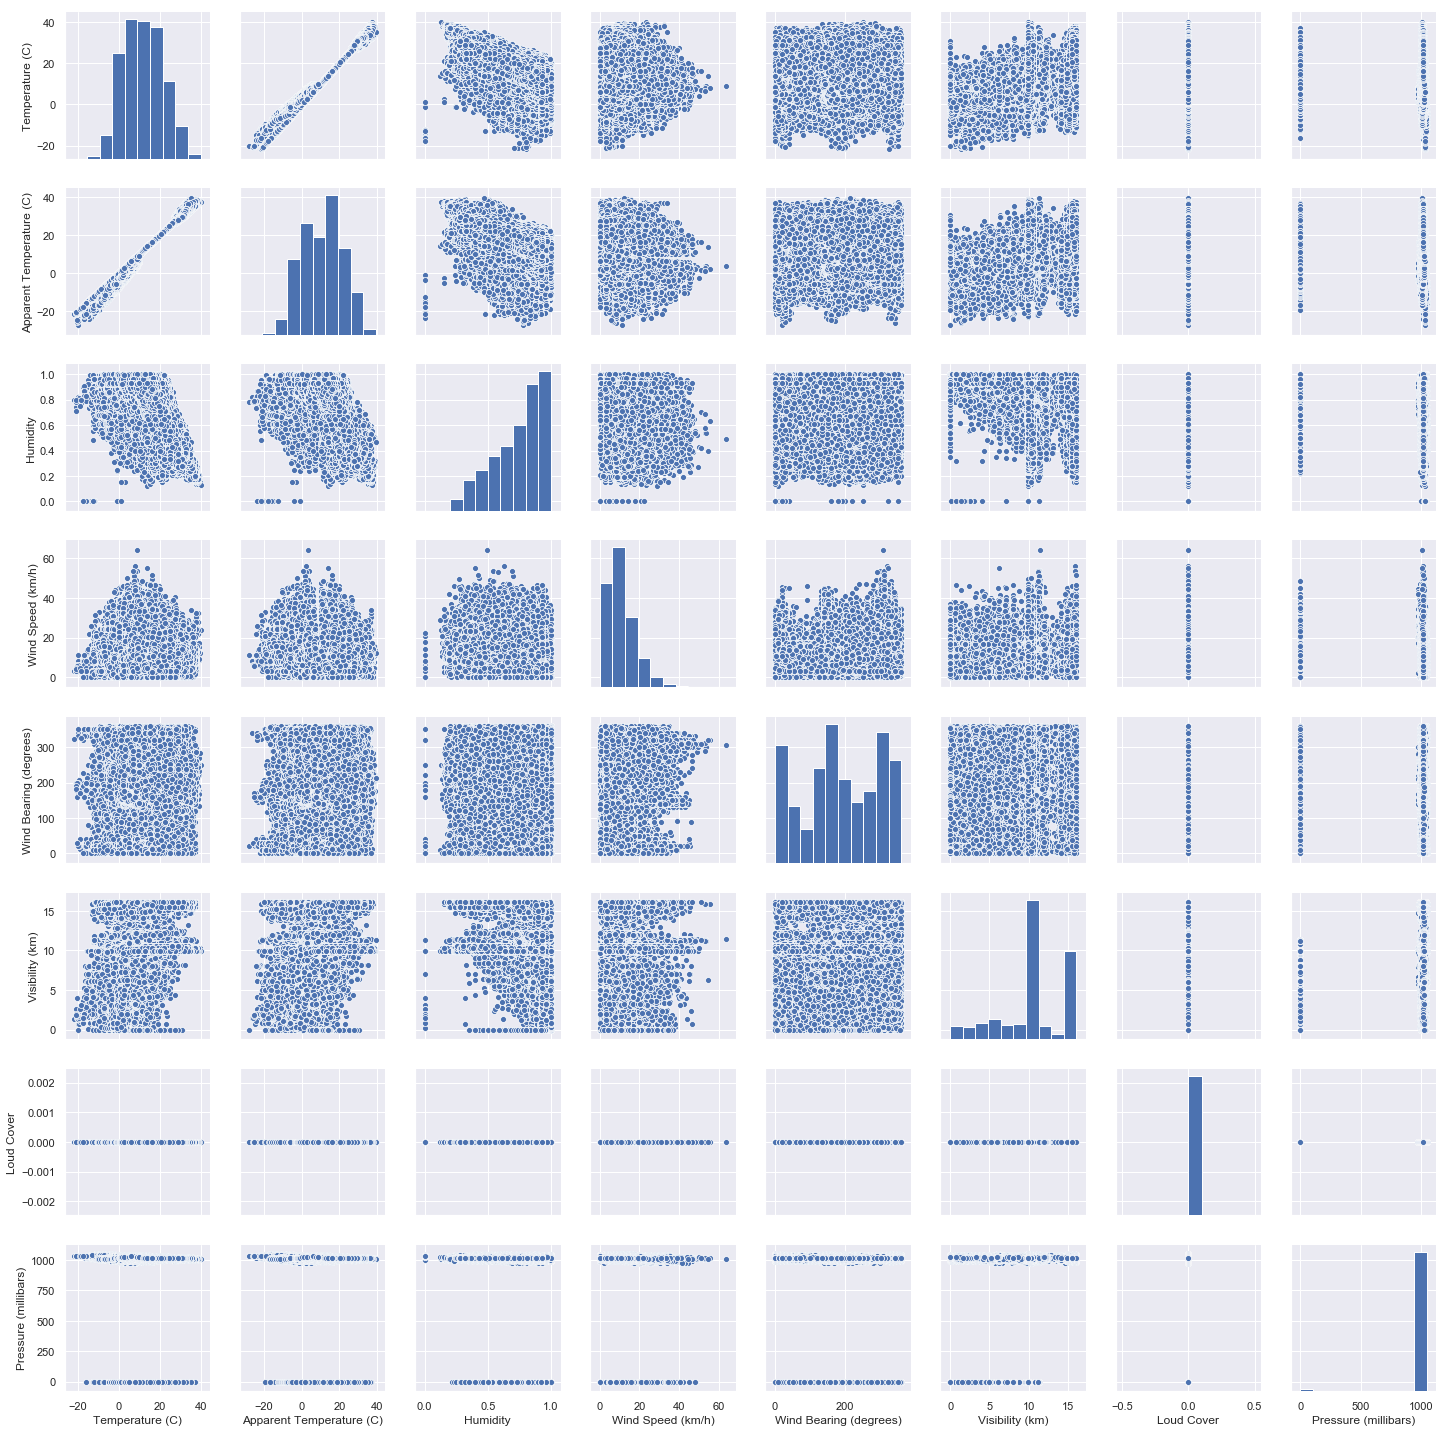

In [20]:
sns.pairplot(weather)

Jika dilihat dari gambar Scatter Plot diatas, terdapat beberapa feature yang diduga memiliki korelasi yang kuat. Namun jika berada dikondisi dimana Scatter Plot tidak dapat memberikan gambaran korelasi antar beberapa feature mana yang kuat. Maka kita bisa mengetahui korelasi tersebut dengan mencari nilai matrix antar feature yaitu dengan menggunakan <b>weather.corr().</b><br>

Korelasi yang kuat dapat dilihat, jika nilai matrix antar feature <b> mendekati nilai 1 atau -1.</b>

In [21]:
weather.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,NaN,-0.005253
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,NaN,-0.000037
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,NaN,0.005375
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,NaN,-0.049453
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,NaN,-0.011629
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,NaN,0.061011
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,NaN,1.000000


Dilihat dari tabel matrix diatas, nilai matrix feature Temperature (C) dan Apparent Temperature (C) memiliki nilai tertinggi yaitu 0.992629	. Namun sayangnya feature Temperature (C) dan Apparent Temperature (C) tidak saling berhubungan atau tidak saling mempengaruhi. 

Dibawah ini tampilan scatter plot untuk  feature Temperature (C) dan Apparent Temperature (C)

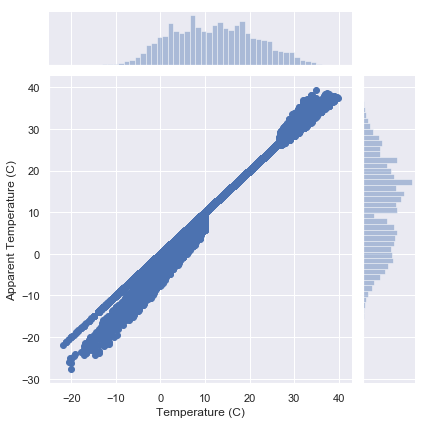

In [22]:
sns.jointplot(x='Temperature (C)',y='Apparent Temperature (C)',data=weather)

Oleh karena itu, pilihlah nilai matrix yang tinggi dan saling berhubungan seperti<b> feature Temperature (C) dan Humidity</b>. <br>
Feature Temperature (C) dan Humidity memiliki nilai matrix yang tinggi setelah nilai matrix feature Temperature (C) dan Apparent Temperature (C). Dua feature tersebut juga saling mempegaruhi namun bersifat berlawanan, dimana ketika temperatur memiliki nilai yang tinggi maka nilai humidity akan rendah, dan berlaku juga sebaliknya

Setelah didapatkan 2 features yang memiliki korelasi kuat maka buatlah scatter plotnya

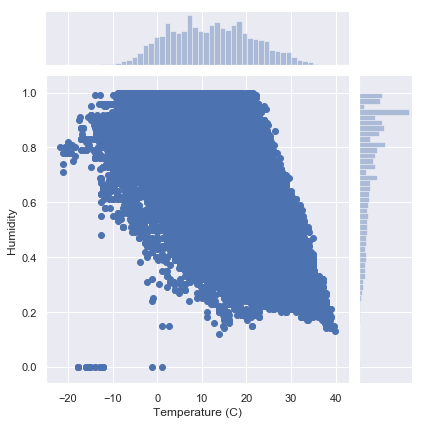

In [23]:
sns.jointplot(x='Temperature (C)',y='Humidity',data=weather)

Dapat diketahui dari proses analisa yang telah dilakukan sebelumnya, bahwa :<br>
    <b>x = Temperature (C)<br>
    y =  Humidity<br></b>

hal itu dikarenakan <b>Temperatur mempengaruhi Humidity</b>

Berikut ini merupakan Statistik Deskriptif dari feature Temperature (C) dan Humidity

<b>Statistik deskriptif  untuk feature Temperature (C)</b><br>
Statistik deskriptif dilakukan untuk mengetahui Count(hitungan nilai), Mean(rata-rata), std(Standar Deviasi ), Min(nilai Minimum), max(nilai maksimum dan Nilai presentil(25%,50%,75%)

In [24]:
weather['Temperature (C)'].describe()

count    95936.000000
mean        11.940976
std          9.570671
min        -21.822222
25%          4.604167
50%         12.033333
75%         18.844444
max         39.905556
Name: Temperature (C), dtype: float64

<b>Statistik deskriptif  untuk feature Humandity</b>

In [25]:
weather['Humidity'].describe()

count    95936.000000
mean         0.734841
std          0.195724
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64

Setelah melakukan statistik deskriptif, selanjutnya menganalisa model yang sesuai dengan pola sebar data dari scatter plot feature Temperature (C) dan Humidity. Berikut ini adalah<b> Scatter Plot Temperature (C) dan Humidity</b> :

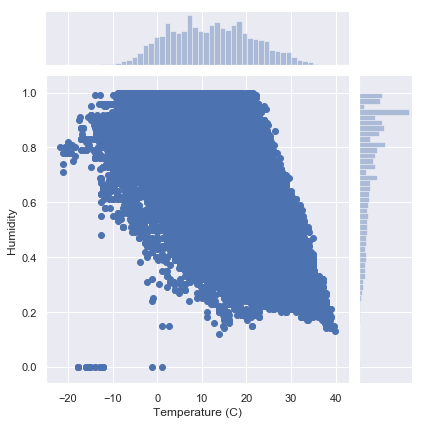

In [26]:
sns.jointplot(x='Temperature (C)',y='Humidity',data=weather)

Dari pola sebar data yang ada digambar scatter plot diatas, di project ini diterapkan dua model regresi yaitu <b>Model Linear Regression dan Polynomial Regression.</b> Berikut ini merupakan proses penerapan untuk menampilkan Model Linear Regression Linear dan Polynomial Regression untuk feature Temperatur(C) dan Humidity 

<b>Model Linear Regression</b>

In [27]:
x = np.array(weather['Temperature (C)']).reshape((-1,1))
y = np.array(weather['Humidity'])

In [28]:
model = LinearRegression()
model.fit(x,y)
model = LinearRegression().fit(x,y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.8892100296894825
slope: [-0.01292768]


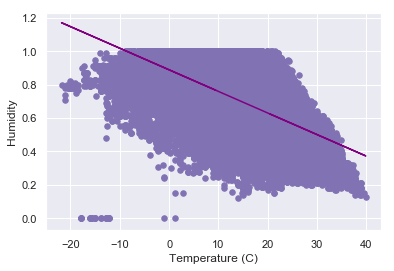

In [29]:
import matplotlib.pyplot as plt 

plt.scatter(x, y, color = "m", marker = "o", s = 30) 
y_pred = model.intercept_ + model.coef_*x 
plt.plot(x, y_pred, color = "purple") 

plt.xlabel('Temperature (C)') 
plt.ylabel('Humidity') 
plt.show() 

<b>Model Polynomial Regression </b>

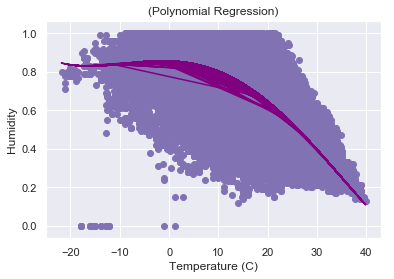

In [30]:
# Mengimpor dataset
X = np.array(weather['Temperature (C)']).reshape((-1,1))
y = np.array(weather['Humidity'])

# Fitting Polynomial Regression ke dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)  ## nantinya degree diganti menjadi 4
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# Visualisasi hasil regresi polynomial
plt.scatter(X, y, color = 'm')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'purple')
plt.title('(Polynomial Regression)')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.show()

Setelah proses pembuatan grafik  Model Linear Regression dan Polynomial Regression untuk  feature Temperatur (C) dan Humidity, selanjutnya menghitung nilai masing - masing <b>Mean absolute error(MAE), Residual sum of squares (MSE) dan R2-score</b>

<b>Model Linear Regression (Mean absolute error(MAE), Residual sum of squares (MSE) dan R2-score)</b>

In [31]:
test_x = np.asanyarray(weather[['Temperature (C)']])
test_y = np.asanyarray(weather['Humidity'])
y_hat= model.predict(test_x)

print("Model Linear")
print("Mean absolute error: %.20f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.20f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.20f" % r2_score(test_y,y_hat) )

Model Linear
Mean absolute error: 0.12227843747436663302
Residual sum of squares (MSE): 0.02299943159092770681
R2-score: 0.39961071626763355891


<b>Model Polynomial Regression (Mean absolute error(MAE), Residual sum of squares (MSE) dan R2-score)</b>

In [32]:
test_x = np.asanyarray(weather[['Temperature (C)']])
test_y = np.asanyarray(weather['Humidity'])
y_hat= lin_reg_2.predict(X_poly)

print("Model Linear")
print("Mean absolute error: %.20f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.20f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.20f" % r2_score(test_y,y_hat) )

Model Linear
Mean absolute error: 0.11270132329454089770
Residual sum of squares (MSE): 0.02035657640787687933
R2-score: 0.46860120084057232948


Dari hasil perhitungan, dapat disimpulkan bahwa <b>Model Polynomial Regresission adalah model yang lebih baik dari pada Model Linear Regresission</b><br> 
karena nilai R2-score Model Polynomial Regresission memiliki nilai yang lebih tinggi<br>

Setelah diketahui model regresi terbaik, maka selanjutnya dapat dilakukan prediksi data. <br>
Saya contohkan <b>jika Temperatur (C) memiliki suhu sebesar 8.4 ° C , berapa Prediksi Humidity atau Kelembapan yang dihasilkan? </b>

In [33]:
Temperatur= 8.4
prediksi = lin_reg_2.predict(poly_reg.fit_transform([[Temperatur]]))
print('Temperatur =',Temperatur, '° C, maka prediksi Humidity/ Kelembapan adalah sebesar ', prediksi)

Temperatur = 8.4 ° C, maka prediksi Humidity/ Kelembapan adalah sebesar  [0.81805771]


Dan berikut ini merupakan contoh dengan menggunakan<b> nilai random untuk nilai temperatur-nya</b> sehingga dapat diketahui nilai Humidity atau nilai kelembapannya

In [34]:
import random
rad_temperatur = 20 * np.random.normal(size=1)
prediksi = lin_reg_2.predict(poly_reg.fit_transform([rad_temperatur]))
print('Temperatur =',rad_temperatur, '° C, maka prediksi Humidity/ Kelembapan adalah sebesar ', prediksi)

Temperatur = [-10.33315269] ° C, maka prediksi Humidity/ Kelembapan adalah sebesar  [0.83950567]


Dari dataset weatherHistory.csv dapat dilihat bahwa data sudah memiliki label bawaan yaitu label Precip Type, untuk membuktikan apakah benar atau tidak bahwa data weatherHistory.csv termasuk ke class classification. <b>Label Precip Type ini di deskripsikan dengan rain dan snow</b>

Dapat kita ambil problem statment yaitu <br>
<b>Apakah feature - feature cuaca/ data cuaca yang ada pada data weatherHistory.csv  sudah akurat sesuai dengan label atau Precip Type?</b>

Dibawah ini merupakan proses untuk menjelaskan problem statment diatas dengan melakukan prediksi data menggunakan model classification 

In [35]:
feature_weather = ['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)']
X = weather[feature_weather]
Y = weather['Precip Type']

In [36]:
print(weather.shape)

(95936, 12)


In [37]:
print(weather['Precip Type'].unique())

['rain' 'snow']


In [38]:
print(weather.groupby('Precip Type').size())

Precip Type
rain    85224
snow    10712
dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #normalisasi data
X_train = scaler.fit_transform(X_train.astype(np.float))

X_test = scaler.transform(X_test.astype(np.float))

Algoritma yang diterapkan sebagai berikut

<b>Logistic Regression</b>

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train.astype(np.float), Y_train.astype(str))))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test.astype(np.float), Y_test.astype(str))))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.99


<b>Decision Tree Classifier</b>

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


<b>Linear Discriminant Analysis</b>

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, Y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test,Y_test)))

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.96
Accuracy of LDA classifier on test set: 0.96


<b>Gaussian NB </b>

In [43]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Accuracy of GNB classifier on training set: {:.2f}' .format(gnb.score(X_train,Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test,Y_test)))

Accuracy of GNB classifier on training set: 0.94
Accuracy of GNB classifier on test set: 0.94


<b>KNeighbors Classifier</b>

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.98


Dari hasil perbandingan 5 algoritma yang telah diterapkan pada data weatherHistory.csv , dapat memberikan penjelasan bahwa <b>Algoritma Decision Tree classifier<b> adalah model paling akurat dari model algoritma lainnya yang diterapkan. 

Nilai training set pada  Algoritma Decision Tree classifier adalah 1 <br>
Nilai test set  pada  Algoritma Decision Tree classifier adalah 1

Berikut ini merupakan bentuk <b> Proses Visualisasi hasil Algoritma Decision Tree classifier dari traning set dan test set</b>

In [45]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Dibawah ini merupakan kode untuk <b>menambahkan list baru yang bernama Type </b> yang nantinya berisi  hasil dari penggubahan nilai Precip Type dari string ke boolean

In [46]:
ListType= []
for tp in weather['Precip Type']:
    if tp == 'rain':
        ListType.append(0)
    else:
        ListType.append(1)
weather['Type'] = ListType
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Type
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,0


In [47]:
print(weather.shape)

(95936, 13)


Dibawah ini adalah pengambilan nilai X dan Y dari feature - feature yang ada di data set weatherHistory.csv<br>
<b> Dimana X = feature ke-3 sampai feature ke-10 dan Y = feature ke-12 </b>

In [48]:
X = weather.iloc[:, [3, 10]].values
Y = weather.iloc[:,12].values

In [49]:
# Menjadi dataset ke dalam Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
# Membuat model Decision Tree Classification terhadap Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train.astype(str), Y_train.astype(str))

 
# Memprediksi hasil test set
Y_pred = classifier.predict(X_test)
 
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.astype(str), Y_pred.astype(str))
print('Confusion Matrix yang dihasilkan\n', cm)

Confusion Matrix yang dihasilkan
 [[21320     0]
 [    0  2664]]


Confusion Matrix diatas menunjukan bahwa <b> prediksi yang dilakukan sudah akurat</b>. Karena dari 23.984 prediksi, tidak menunjukan adanya kesalahan, sehingga <b>akurasinya adalah 100%</b>

<b> Visualisasi hasil Algoritma Decision Tree classifier dari Traning Set dan Test Set </b>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


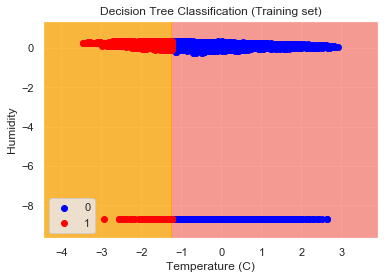

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


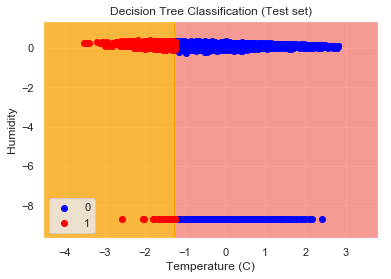

In [50]:
# Visualisasi hasil model Decision Tree Classification dari Training set
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.legend()
plt.show()

# Visualisasi hasil model Decision Tree Classification dari Test set
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.legend()
plt.show()

Dari Hasil Visualisasi Algoritma Decision Tree classifier dapat dikethui bahwa <br>
<b>Zona yang berwarna Oren </b>adalah zona dimana jika jenis curah hujan/ Precip Type adalah snow<br>
<b>Zona yang berwarna Pink adalah</b>  zona dimana data jenis curah hujan/Precip Type adalah rain<br>
<b>Titik - Titik </b> adalah data/feature cuaca<br>
<b>Titik - Titik Merah</b> adalah data cuaca /feature yang menunjukan bahwa jenis curah hujan/ Precip Type snow<br>
<b>Titik - Titik Biru <b>adalah data cuaca /feature yang menunjukan bahwa jenis curah hujan/ Precip Type rain<br>

Seperti yang telah dijelaskan pada bagian Confusion Matrix, hasil visualisasi traning set dan test set menujukan bahwa <b> predsi 100% akurat</b>.<br>
Hal itu dapat dilihat dari hasil Visualisasi  yang menunjukan bahwa tidak adanya titik yang melesat atau berada di zona yang salah, yang berarti bahwa titik- titik merah dan biru seluruhnya telah berada dizona warna yang tepat yang menunjukan bahwa tidak adanya kesalahan.